In [170]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [52]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [53]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [54]:
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [55]:
Base.classes.keys()

['measurement', 'station']

In [56]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [57]:
session = Session(engine)

In [58]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [59]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [97]:
x = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(x)

('2017-08-23',)


In [98]:
y = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(y)

2016-08-23


In [100]:
t1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

In [101]:
t2 = pd.DataFrame(t1)
t2.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [102]:
t2.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<IPython.core.display.Javascript object>


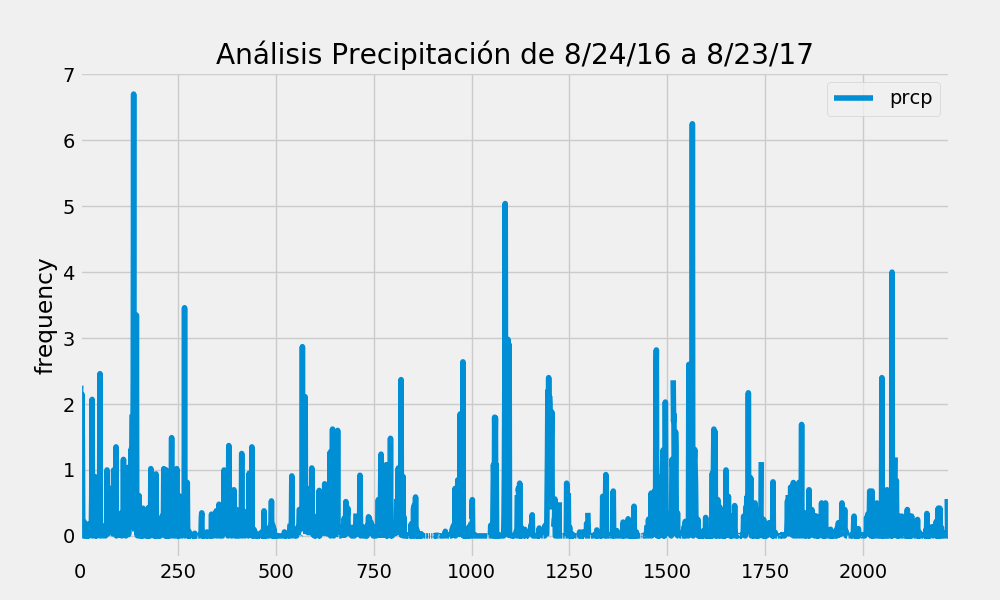

In [168]:
    
ax = t2.plot(figsize=(10,6))
ax.set_title("Análisis Precipitación de 8/24/16 a 8/23/17")
ax.set_ylabel('frequency')
plt.show()

In [104]:
t2.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [106]:
loc = session.query(Measurement).group_by(Measurement.station).count()
print("Hay {} disponibles.".format(loc))

Hay 9 disponibles.


In [107]:
active = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
            group_by(Measurement.station)
active

In [68]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [108]:
active = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
            group_by(Measurement.station).\
            order_by (Measurement.station).all()
active

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [109]:
most_active = session.query(Measurement.station, 
                                    func.count(Measurement.station).\
                                    label('count')).\
                                    group_by(Measurement.station).\
                                    order_by(Measurement.station).limit(1)[0][0]
most_active

'USC00511918'

In [135]:
temp = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
session.query(*temp).filter(Measurement.station==most_active).all()

[(53.0, 87.0, 71.61596766043456)]

In [158]:

engine.execute('SELECT TOBS,DATE fROM Measurement where station="USC00511918" GROUP BY DATE ORDER BY DATE DESC' ).fetchall()

[(64.0, '2015-10-30'),
 (68.0, '2015-10-29'),
 (82.0, '2015-10-28'),
 (72.0, '2015-10-26'),
 (74.0, '2015-10-25'),
 (71.0, '2015-10-22'),
 (71.0, '2015-10-21'),
 (75.0, '2015-10-20'),
 (71.0, '2015-10-19'),
 (72.0, '2015-10-16'),
 (72.0, '2015-10-15'),
 (72.0, '2015-10-14'),
 (72.0, '2015-10-13'),
 (73.0, '2015-10-12'),
 (84.0, '2015-10-09'),
 (83.0, '2015-10-08'),
 (77.0, '2015-09-25'),
 (76.0, '2015-09-24'),
 (77.0, '2015-09-23'),
 (76.0, '2015-09-22'),
 (81.0, '2015-09-21'),
 (74.0, '2015-09-18'),
 (71.0, '2015-09-17'),
 (74.0, '2015-09-14'),
 (73.0, '2015-09-04'),
 (76.0, '2015-09-03'),
 (76.0, '2015-09-02'),
 (78.0, '2015-09-01'),
 (82.0, '2015-08-30'),
 (86.0, '2015-08-28'),
 (84.0, '2015-08-27'),
 (76.0, '2015-08-26'),
 (79.0, '2015-08-25'),
 (82.0, '2015-08-24'),
 (75.0, '2015-08-20'),
 (73.0, '2015-08-19'),
 (73.0, '2015-08-17'),
 (78.0, '2015-08-14'),
 (76.0, '2015-08-13'),
 (76.0, '2015-08-06'),
 (76.0, '2015-08-05'),
 (84.0, '2015-08-04'),
 (85.0, '2015-08-03'),
 (82.0, '20

In [176]:
temp_obs = session.query(Measurement.tobs).\
                                filter(Measurement.station=='USC00511918')
temp_obs_df = pd.DataFrame(temp_obs)
temp_obs_df.head()

,tobs
0,66.0
1,70.0
2,75.0
3,75.0
4,75.0


<IPython.core.display.Javascript object>


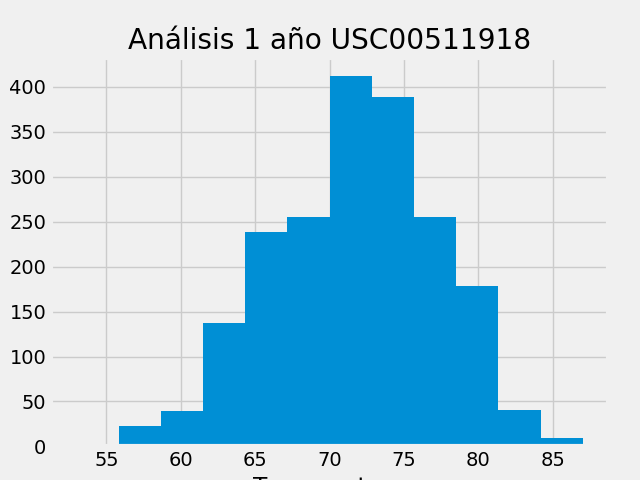

In [198]:
plt.hist(temp_obs_df['tobs'], bins=12)
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.title("Análisis 1 año " + most_active)
plt.show()